# Multiprocessing using Pools 
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [2]:
import time
import math
import multiprocessing
from multiprocessing import Pool
import func
import prime

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    print("Results", result)
    print("Overall Time:", int(time.time()-tp1))
 

In [3]:
dataRange = range(10)

Use the pool_process function to apply my_func to the data in dataRange.  
This task is so light it requires very little processing time. 

In [4]:
pool_process(func.my_func, dataRange, 2)

Results [0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0]
Overall Time: 0


## A naive function for checking primes
This has been moved to another file "prime.py" to avoid error

<h2>We are going to test a list of million-level prime numbers with different poolsizes, and plot the cores-time curve</h2>

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import timeit
from functools import partial

In [6]:
prime_list=[15485863, 32452843, 49979687, 67867967, 86028121, 104395301, 122949823, 141650939, 160481183]

Results [True, True, True, True, True, True, True, True, True]
Overall Time: 92
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 92
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 91
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 92
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 92
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 73
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 74
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 73
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 74
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 75
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 70
Results [True, True, True, True, True, True, True, True, True]
Overall Time: 65
Results [True, True, True, True, True, T

No handles with labels found to put in legend.


Results [True, True, True, True, True, True, True, True, True]
Overall Time: 48


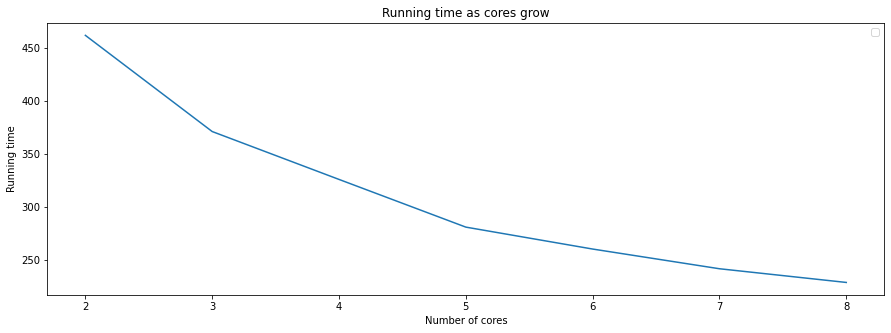

In [9]:
def timing(fn, method, prime_list, cores, nTests):
    """
    Run timer and plot
    """
    testNTimer = timeit.Timer(partial(fn, method, prime_list, cores)) #using partial method to test the running time of fn
    t = testNTimer.timeit(number=nTests) # assign the spent time to t
    return t

plt.figure(figsize=(15,5)) #figure size
plt.xlabel("Number of cores") # xlabel
plt.ylabel("Running time") #ylabel

x_list = []
y_list = []
for i in range(2,9):
    x_list.append(i)
    y_list.append(timing(pool_process, prime.check_prime, prime_list, i, 5))

p = plt.plot(x_list, y_list, '-') #plot
plt.title('Running time as cores grow') #title
plt.legend()